# Итоговая работа.

In [119]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
%matplotlib inline

## Задание 1


Вычислите производную функции: 

$tg^2(sin(x) + cos(2x+3))$ 

в точке $x_0=1$


In [120]:
### YOUR CODE HERE
from sympy import *

x = Symbol('x')
f = tan(sin(x) + cos(2*x+3))**2
d1 = diff(f)
e = d1.evalf(subs={x:1})
e

55.3859176353379

## Задание 2

Дан объект в $2D$ пространстве

(-200.0, 200.0)

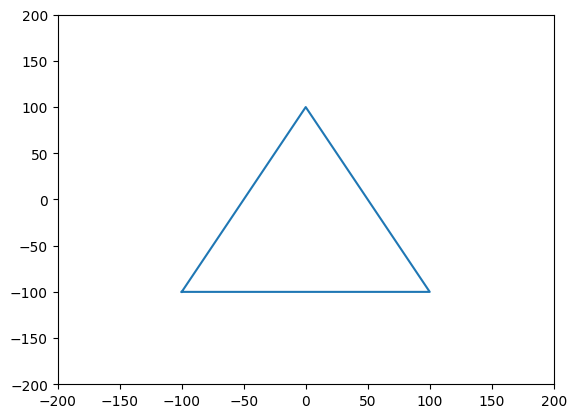

In [121]:
import numpy as np
import matplotlib.pyplot as plt

A = [
    [-100, -100, 1],
    [0, 100, 1],
    [100, -100, 1],
    [-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

При помощи матричных операций выполните:
- Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)


(-200.0, 400.0)

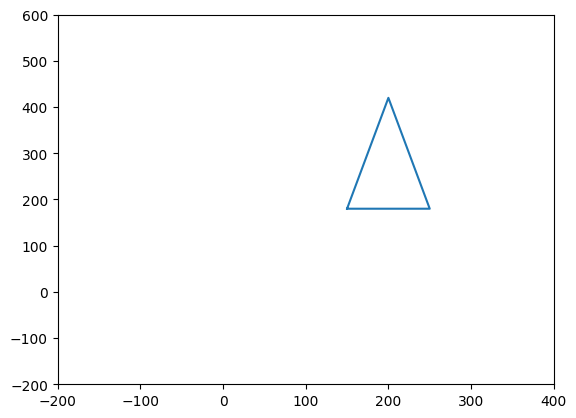

In [122]:
### YOUR CODE HERE
resize = np.array([ [0.5,0.0,0.0],
                    [0.0,1.2,0.0],
                    [0.0,0.0,0.0]
                ])
B = A@resize            # изменение размера
B = B + [[200, 300, 0]]     # сдвиг
x = B[:,0]
y = B[:,1]
plt.plot(x, y)
plt.ylim([-200, 600])
plt.xlim([-200, 400]) 

## Задание 3


Найдите собственные значения и собственные вектора матрицы:

In [123]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [124]:
### YOUR CODE HERE
mval, mvec = np.linalg.eig(m) # получаю собственные вектора и собственные значения
mval, mvec


(array([ 3., -1.]),
 array([[ 0.89442719, -0.89442719],
        [ 0.4472136 ,  0.4472136 ]]))

## Задание 4


Дана функция с неизвестными параметрами a и b, вам также известны значения функции `fx` в точках `x`. 

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку `error`.


In [125]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [126]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

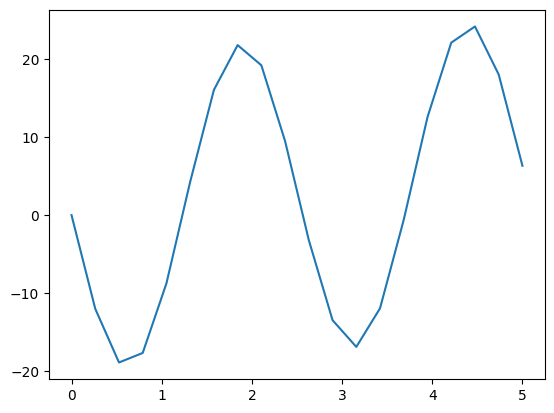

In [127]:
plt.plot(x, fx)
plt.show()

In [128]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [129]:
### YOUR CODE HERE
from scipy.optimize import minimize

x0 = [10,10]

result_m = minimize(error, x0,  method='Nelder-Mead')
result_m

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.00010237094903331467
             x: [ 3.000e+00  2.138e+01]
           nit: 67
          nfev: 135
 final_simplex: (array([[ 3.000e+00,  2.138e+01],
                       [ 3.000e+00,  2.138e+01],
                       [ 3.000e+00,  2.138e+01]]), array([ 1.024e-04,  1.329e-04,  1.788e-04]))

## Задание 5



Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [130]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [131]:
# РЕШЕНИЕ
res = pairwise_distances(raitings) # строю матрицу наиболее похожих пользователей

a = [] # список результатов

for i, c in enumerate(res): # список для проверки каждого элементи матрицы
    for n in c:
        out = np.where(c == np.min(c[np.nonzero(c)]))[0][0] # ищу наиболее похожего пользователя, исключаю самого польователя, т.к. больше всего похож он на самого себя
    b = [i, out]
    a.append(b)
a

[[0, 8],
 [1, 4],
 [2, 9],
 [3, 7],
 [4, 1],
 [5, 7],
 [6, 3],
 [7, 3],
 [8, 0],
 [9, 2]]

In [132]:
#ТРЕНИРОВКА
# from sklearn.metrics import pairwise_distances

# u = np.array([[4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6]])
# u
# res = pairwise_distances(u, raitings)
# res
# out = np.where(res == np.min(res[np.nonzero(res)]))
# out[0][0], out[1][0]
# np.where(res == res.min() & res != 0)
# np.where( res > 0, res == res.min())

# for n in raitings:
    # pairwise_distances(raitings)
# raitings[0]
# pairwise_distances(raitings[0:1], raitings[1:5])
